# 10 - Machine learning para clasificación

![](images/portada_nb_FAV.png)

## Módulo 6 - Aprendizaje de máquina supervisado
### Profesor: M.Sc. Favio Vázquez

In [1]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from imports import *

In [3]:
X, y = mglearn.datasets.make_forge()

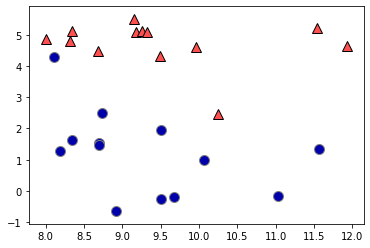

In [4]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.show()

En los modelos lineales de clasificación la salida $\hat{y}$, es una función lineal de las características. Para los modelos lineales de clasifación, la salida es una frontera de decisión la cual es una función lineal de las entradas. En otras palabras, un clasificador, separa las dos clases (si es binario) con una línea, un plano o un hiperplano.

In [8]:
list(zip([1, 2], [3, 4]))

[(1, 3), (2, 4)]

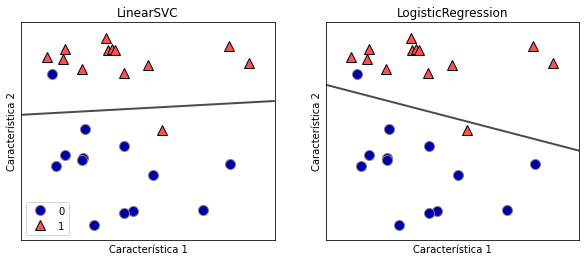

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

for model, ax in zip([LinearSVC(max_iter=10000), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, alpha=0.7, ax=ax)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")
axes[0].legend()

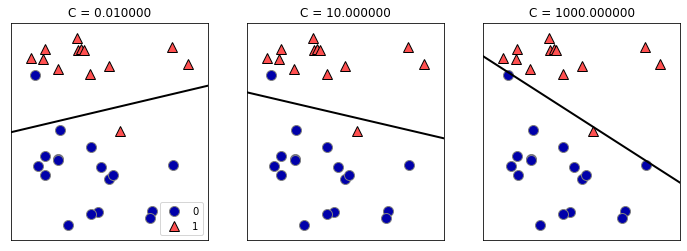

In [6]:
mglearn.plots.plot_linear_svc_regularization()

La tercera presenta mayor sobreajuste

## Ejemplo

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,
                                                    random_state=123)

stratify permiter mantener proporciones en training y test

In [12]:
clf = LogisticRegression(max_iter=10000).fit(X_train, y_train)

In [20]:
clf.n_iter_

array([1919])

In [15]:
clf.score(X_train,y_train) # Accuracy

0.960093896713615

In [14]:
clf.score(X_test,y_test)

0.958041958041958

## Modifiquemos C para la regresión logística

In [16]:
logreg1 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("El accuracy del training es :", logreg1.score(X_train,y_train))
print("El accuracy del test es :", logreg1.score(X_test,y_test))

El accuracy del training es : 0.960093896713615
El accuracy del test es : 0.958041958041958


In [21]:
logreg1.n_iter_

array([1919])

In [17]:
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("El accuracy del training es :", logreg100.score(X_train,y_train))
print("El accuracy del test es :", logreg100.score(X_test,y_test))

El accuracy del training es : 0.9812206572769953
El accuracy del test es : 0.965034965034965


In [18]:
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("El accuracy del training es :", logreg001.score(X_train,y_train))
print("El accuracy del test es :", logreg001.score(X_test,y_test))

El accuracy del training es : 0.9553990610328639
El accuracy del test es : 0.9370629370629371


Entre más grande es **C** más regularizamos

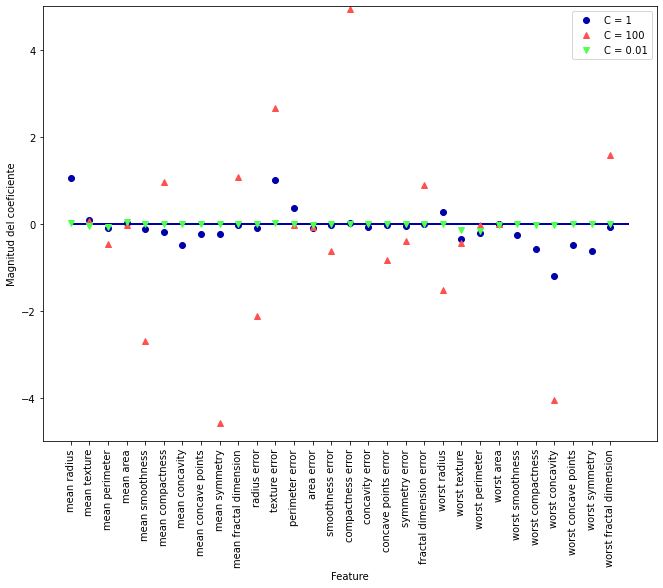

In [19]:
plt.figure(figsize=(11,8))
plt.plot(logreg1.coef_.T, 'o', label="C = 1")
plt.plot(logreg100.coef_.T, '^', label="C = 100")
plt.plot(logreg001.coef_.T, 'v', label="C = 0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("Magnitud del coeficiente")
plt.legend()
plt.show()

## Modelos lineales de clasificación multiclase

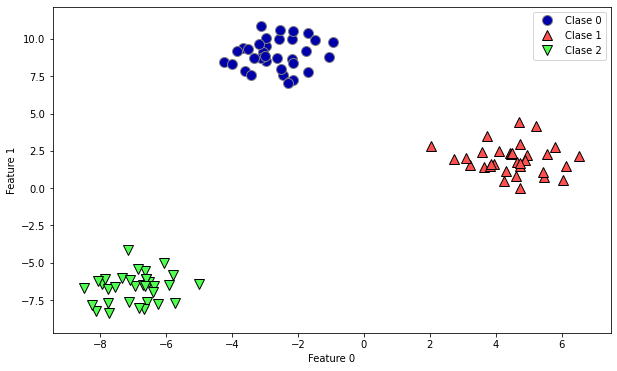

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
plt.figure(figsize=(10,6))
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Clase 0", "Clase 1", "Clase 2"])

In [34]:
X

array([[-7.726, -8.395],
       [ 5.453,  0.742],
       [-2.979,  9.557],
       [ 6.043,  0.571],
       [-6.522, -6.319],
       [ 3.649,  1.407],
       [-2.178,  9.99 ],
       [ 4.42 ,  2.33 ],
       [ 4.737,  2.942],
       [-3.66 ,  9.39 ],
       [-3.054,  9.125],
       [-6.652, -5.573],
       [-6.358, -6.583],
       [-3.616,  7.818],
       [-1.771,  9.186],
       [-7.951, -6.398],
       [-6.603, -6.053],
       [-2.581, 10.018],
       [-7.763, -6.726],
       [-6.406, -6.953],
       [-2.973,  8.549],
       [-6.957, -6.539],
       [-7.326, -6.024],
       [-2.148, 10.552],
       [-2.545, 10.579],
       [-2.97 , 10.071],
       [ 3.225,  1.553],
       [-6.254, -7.737],
       [-7.854, -6.093],
       [-8.117, -8.201],
       [-7.56 , -6.648],
       [ 4.936,  2.234],
       [ 4.448,  2.275],
       [-5.721, -7.701],
       [-0.93 ,  9.782],
       [-3.11 ,  8.723],
       [-2.442,  7.59 ],
       [-2.185,  8.629],
       [ 5.555,  2.302],
       [ 4.732, -0.014],


In [23]:
linear_svm = LinearSVC().fit(X,y)
print("Forma de los coeficientes es: ", linear_svm.coef_.shape)
print("Forma del intercepto: ", linear_svm.intercept_.shape)

Forma de los coeficientes es:  (3, 2)
Forma del intercepto:  (3,)


Parámetros para cada una de las líneas

In [26]:
linear_svm.intercept_

array([-1.077,  0.131, -0.086])

In [27]:
linear_svm.coef_

array([[-0.175,  0.231],
       [ 0.476, -0.069],
       [-0.189, -0.204]])

$$
y = w_1 * x_1 + w_2* x_2 + b_1
$$

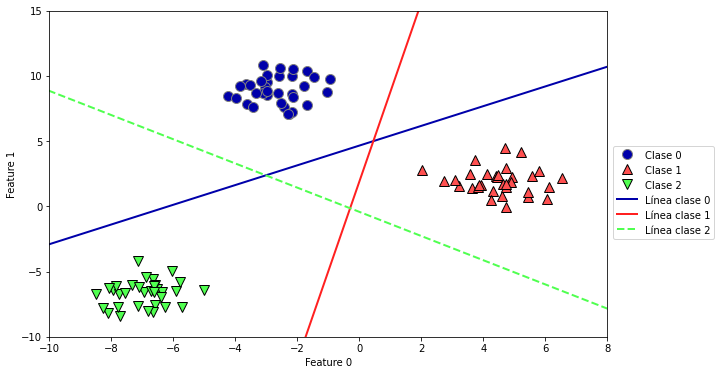

In [33]:
plt.figure(figsize=(10,6))
line = np.linspace(-15,15)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10,15)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(["Clase 0", "Clase 1", "Clase 2", "Línea clase 0", "Línea clase 1", "Línea clase 2"],
               loc=(1.01, 0.3))
plt.show()

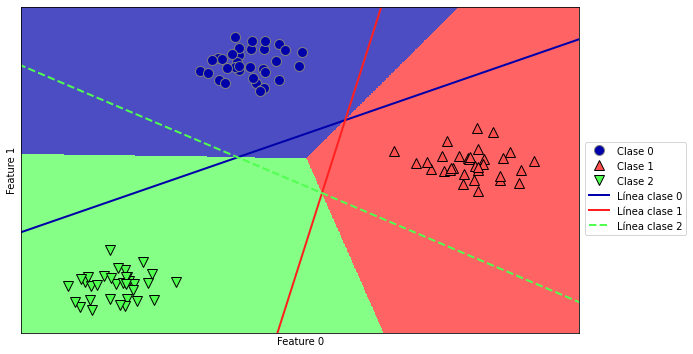

In [25]:
plt.figure(figsize=(10,6))
line = np.linspace(-15,15)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10,13)
    plt.xlim(-10,8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(["Clase 0", "Clase 1", "Clase 2", "Línea clase 0", "Línea clase 1", "Línea clase 2"],
               loc=(1.01, 0.3))
plt.show()